# Linear Discriminant Analysis (LDA)
<span style="color:gray">*Author: Taylor Downey* <br/> *Made for Santa Clara University Graduate Course COEN 240 - Machine Learning - taught by Professor David Anastasiu*</span>

LDA is a simplified version of Guassian Discriminant Analysis (also known as Quadratic Discriminant Analysis or QDA) where we assume that each feature has the same variance. LDA can be used for multi-class classification and is considered to be more stable than logistic regression when the classes are well seperated or there are few examples from which to estimate the parameters. Couple things to note when using LDA <br/>
**Gaussian Distribution** - The standard implementation of the model assumes a Gaussian distribution of the input variables. This means that the samples taken from the environment will follow a bell shaped curve. <br/>
**Effect of Outliers** - Before using LDA, attempt to remove all outliers. Outliers can drastically skew the mean and standard deviation, both of which are used to seperate the classes. <br/>
**Same Variance** - This has already been mentioned but is imporant to reiterate. LDA assumes that the Guassian distribution of each feature exhibits the same variance. As a result, it is always a good idea to standardize the dataset so that is has a mean of 0 and standard deviation of 1.

### Bayes Classifier

It is possible to show (proof outside scope of this activity) that the test error rate of a given dataset can be minimized by assigning each observation to the most likely class given its predictor values. Written as a conditional probability, this means that a test observation with predictor vector x0 should be assigned to class j for which <br/>
<b1><center>$Pr(Y = j|X = x0)$</center></b1> <br/>
is largest. In a two class problem, this means that the test observation will be assigned to class 1 if $Pr(Y = 1|X = x0) > 0.5$ and class 0 otherwise. <br/>

The conditional probability above is just Bayes Theorem and can be rewritten as below: 

<b1><center>$Pr(Y|X) = \frac{P(Y)P(X|Y)}{P(X)}$</center></b1> <br/>

Using the Total Probability Theorem we can expand $P(X)$ so that we can rewrite the equation to

<b1><center>$Pr(Y|X) = \frac{P(Y)P(X|Y)}{\sum_{i=1}^{N} P(Y_i)P(X|Y_i)}$</center></b1> <br/>

This seems great because now we have a way to classify our dataset! The only issue is we don't know the $P(X|Y)$... <br/>
What is the probability that we get a test observation of x0 given the class j?? The reality is, we don't know! That would require us to know the distribution of the sample space. However, what if we assume that the distribution we are sampling from is normal (Guassian)? <br/>

### Expressing LDA Mathematically (for one predictor)

This is essentially what LDA is doing. We claim that the distribution of each predictor is Gaussian which enables us to follow through with the Bayes theorem computation. If we assume 1 predictor (for now) we can rewrite Bayes theorem yet another way that is more common to LDA

<b1><center>$Pr(Y=k|X=x) = \frac{\pi_{k}f_{k}(x)}{\sum_{i=1}^{K} \pi_{i}f_{i}(x)}$</center></b1> <br/>

Where <br/>
$K$= number of classes <br/>
$\pi_{k}$= the probability of class K <br/>
$f_{k}(x)$ = the Gaussian distribution which takes the form $\frac{1}{\sqrt{2\pi}\sigma_{k}}exp(-\frac{1}{2\sigma_k^2}(x - \mu_k)^2$ 

After some mathematical finesse, it can be shown that a test observation belongs to class k where $\delta_k$ is largest 

<b1><center>$\delta_k(x) = x * \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k) $</center></b1> <br/>

Where <br/>
$\mu_k$= the mean of class K <br/>
$\sigma$= the standard deviation of the predictor <br/>
$\pi_k$= the prior probability of class K

### Showing LDA at work

To demonstrate LDA with a single predictor, we will use the famous iris dataset from UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Iris <br/>
In this dataset there are three classes: Iris Setosa, Iris Versicolour, Iris Virginica. <br/>
Each class has four attributes: Sepal Length, Sepal Width, Petal Length, or Petal Width

In [1]:
from sklearn import preprocessing
import pandas as pd
def LoadData(sfile):
    # Load samples
    df = pd.read_csv(
        filepath_or_buffer=sfile, 
        header=None,
        names = ["sepal_len", "sepal_wid", "petal_len", "petal_wid", "class"])
    return df

def ParseData(df):
    le = preprocessing.LabelEncoder()
    le.fit(df['class'])
    df['class'] = le.transform(df['class'])
    labels = df.iloc[:,4].values
    df = df.drop(['class'], axis=1)
    samples = df.iloc[:,:].values
    return samples, labels

df = LoadData('iris.data')
df

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
# Extract features and labels
[samples, labels] = ParseData(df)

We can now run LDA on the dataset using one predictor. For this, sepal length has been chosen and a histogram of the predictor is graphed below

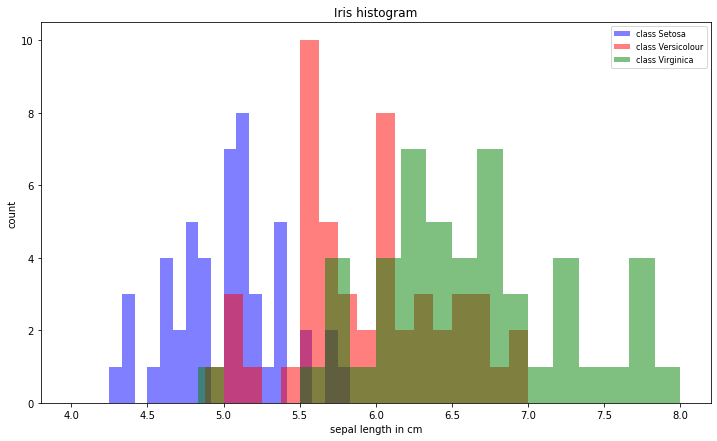

In [3]:
from matplotlib import pyplot as plt
import math
import numpy as np
import scipy.stats as stats

sepalLength = df['sepal_len']
plSetosa = sepalLength[0:49]
plVersicolour = sepalLength[50:100]
plVirginica = sepalLength[101:150]
fig, ax = plt.subplots(figsize=(12, 7))

min_b = math.floor(np.min(plSetosa))
max_b = math.ceil(np.max(plSetosa))
bins = np.linspace(min_b, max_b, 25)
ax.hist(plSetosa,
        color='blue',
        label='class Setosa',
        bins=bins,
        alpha=0.5,)

min_b = math.floor(np.min(plVersicolour))
max_b = math.ceil(np.max(plVersicolour))
bins = np.linspace(min_b, max_b, 25)
ax.hist(plVersicolour,
        color='red',
        label='class Versicolour',
        bins=bins,
        alpha=0.5,)

min_b = math.floor(np.min(plVirginica))
max_b = math.ceil(np.max(plVirginica))
bins = np.linspace(min_b, max_b, 25)
ax.hist(plVirginica,
        color='green',
        label='class Virginica',
        bins=bins,
        alpha=0.5,)

leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
ax.set_title('Iris histogram')
ylims = ax.get_ylim()
ax.set_ylabel('count')
ax.set_xlabel('sepal length in cm')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(
    sepalLength, labels.reshape(-1,1), test_size=0.30, random_state=42)

X_train = X_train.ravel().reshape(-1,1)
X_test = X_test.ravel().reshape(-1,1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
y_pred = lda.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: {:.4f}'.format(acc))

Accuracy: 0.7111


When running LDA, we find that we get an accuracy of 0.7111. The reason for misclassifications is because the Gaussian distributions of each class are overlapping each other, causing some of the points to be incorrectly labeled. In order to show these distributions, we must know how to calculate sigma. We said earlier that sigma is the standard deviation of the predictor and it can be expressed as

<b1><center>$\sigma^2 = \frac{1}{n-K}\sum_{k=1}^K \sum_{i:y_i=k} (x_i - \mu_k)^2 $</center></b1> <br/>

Where <br/>
$n$= total number of training observations <br/>
$n_k$= the number of training observations in the kth class <br/>
$\mu_k$= is the average of all the training observations from the kth class <br/>
$K$= the total number of classes

The code snippet below calculates sigma and then uses it to graph the distributions off all three classes

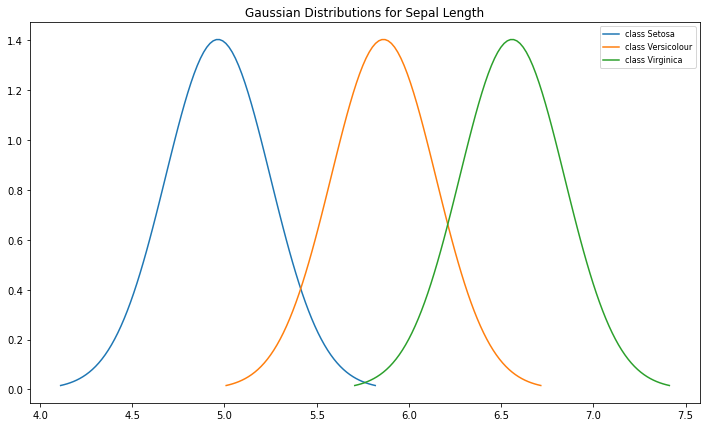

In [5]:
# Calculate standard deviation
means = lda.means_
x1= 0
n1 = 0
i = 0
for ele in y_train:
    if (ele == 0):
        x1 += (X_train[i] - means[0]) * (X_train[i] - means[0])
        n1 += 1
    elif (ele == 1):
        x1 += (X_train[i] - means[1]) * (X_train[i] - means[1])
        n1 += 1 
    else:
        x1 += (X_train[i] - means[2]) * (X_train[i] - means[2])
        n1 += 1 
          
    i += 1

sigma=x1/(n1-2)

fig, ax = plt.subplots(figsize=(12, 7))
set_dist = np.linspace(means[0] - 3*sigma, means[0] + 3*sigma, 100)
plt.plot(set_dist, stats.norm.pdf(set_dist, means[0], sigma), label='class Setosa')
ver_dist = np.linspace(means[1] - 3*sigma, means[1] + 3*sigma, 100)
plt.plot(ver_dist, stats.norm.pdf(ver_dist, means[1], sigma), label='class Versicolour')
vir_dist = np.linspace(means[2] - 3*sigma, means[2] + 3*sigma, 100)
plt.plot(vir_dist, stats.norm.pdf(vir_dist, means[2], sigma), label='class Virginica')
leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
ax.set_title('Gaussian Distributions for Sepal Length')
plt.show()

Now, lets take 2 points that have been misclassified and see why that is the case

All mislabeled samples: [1, 4, 5, 12, 15, 21, 31, 32, 36, 40, 42, 43, 44], we will pick test samples 1 and 15 for demonstration
Test sample 1 was misclassified as Versicolour when it was actually Setosa
Test sample 15 was misclassified as Virginica when it was actually Versicolour


C:\Users\taylor\AppData\Local\Temp\ipykernel_2420\459218307.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_test[missIndex[1]],stats.norm.pdf(X_test[missIndex[1]], means[y_test[missIndex[1]][0]], sigma),'ro', color='black', label='Test Sample 2')


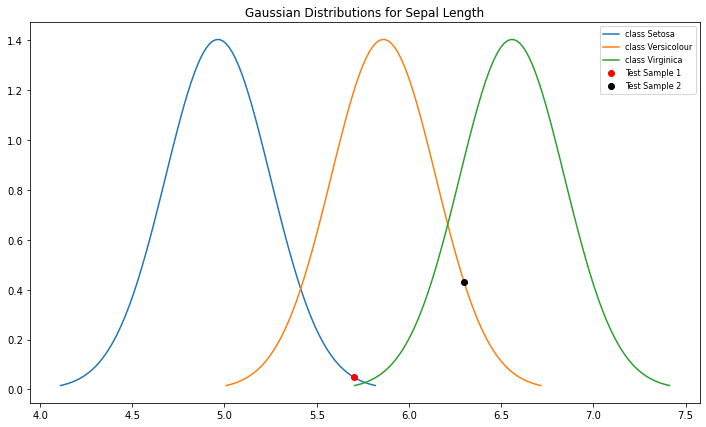

In [6]:
missIndex = []
classes = ["Setosa", "Versicolour", "Virginica"]
for index,ele in enumerate(y_test):
    if not ele[0] == y_pred[index]:
        missIndex.append(index)

print('All mislabeled samples: {}, we will pick test samples 1 and 15 for demonstration'.format(missIndex))
missIndex = [1,15]
        
print('Test sample %i was misclassified as %s when it was actually %s' % (missIndex[0], classes[y_pred[missIndex[0]]], classes[y_test[missIndex[0]][0]]))
print('Test sample %i was misclassified as %s when it was actually %s' % (missIndex[1], classes[y_pred[missIndex[1]]], classes[y_test[missIndex[1]][0]]))

fig, ax = plt.subplots(figsize=(12, 7))
set_dist = np.linspace(means[0] - 3*sigma, means[0] + 3*sigma, 100)
plt.plot(set_dist, stats.norm.pdf(set_dist, means[0], sigma), label='class Setosa')
ver_dist = np.linspace(means[1] - 3*sigma, means[1] + 3*sigma, 100)
plt.plot(ver_dist, stats.norm.pdf(ver_dist, means[1], sigma), label='class Versicolour')
vir_dist = np.linspace(means[2] - 3*sigma, means[2] + 3*sigma, 100)
plt.plot(vir_dist, stats.norm.pdf(vir_dist, means[2], sigma), label='class Virginica')
ax.set_title('Gaussian Distributions for Sepal Length')

plt.plot(X_test[missIndex[0]],stats.norm.pdf(X_test[missIndex[0]], means[y_test[missIndex[0]][0]], sigma),'ro', label='Test Sample 1') 
plt.plot(X_test[missIndex[1]],stats.norm.pdf(X_test[missIndex[1]], means[y_test[missIndex[1]][0]], sigma),'ro', color='black', label='Test Sample 2') 
leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
plt.show()

In [7]:
# Calculate Deltas by hand to see how samples get missclassified

# Sample 1
priors = lda.priors_
delta0 = (X_test[1]*means[0])/(sigma*sigma) - (means[0]*means[0])/(2*sigma*sigma) + np.log(priors[0])
delta1 = (X_test[1]*means[1])/(sigma*sigma) - (means[1]*means[1])/(2*sigma*sigma) + np.log(priors[1])
delta2 = (X_test[1]*means[2])/(sigma*sigma) - (means[2]*means[2])/(2*sigma*sigma) + np.log(priors[2])
print("Delta0: {} Delta1: {} Delta2: {}".format(delta0, delta1, delta2))

# Sample 15
priors = lda.priors_
delta0 = (X_test[15]*means[0])/(sigma*sigma) - (means[0]*means[0])/(2*sigma*sigma) + np.log(priors[0])
delta1 = (X_test[15]*means[1])/(sigma*sigma) - (means[1]*means[1])/(2*sigma*sigma) + np.log(priors[1])
delta2 = (X_test[15]*means[2])/(sigma*sigma) - (means[2]*means[2])/(2*sigma*sigma) + np.log(priors[2])
print("Delta0: {} Delta1: {} Delta2: {}".format(delta0, delta1, delta2))

Delta0: [196.36201708] Delta1: [199.72162597] Delta2: [195.31610491]
Delta0: [233.20437315] Delta1: [243.22553654] Delta2: [243.9947545]


We can now visually see above why both test samples were labeled incorrectly. They deviated far enough away from the mean of each class that they were statstically more likely to have been from a different class than that of which they actually were. We can also calculate the deltas by hand to show how the math played out to incorrectly classify the samples. It is not a surprise that sample 15 was just barely mislabeled since it is close to the intersection of the Versicolour and Virginica distributions

### LDA with greater than one predictor

When we extend the LDA classifier to multiple predictors, the Gaussian distribution turns into a multi-variate Gaussian distirubtion with a class-specific mean vector and a common covariance matrix. The mulivariate Gaussian distribution assumes each individual predictor follows a one dimensional normal distribution with some correlation between each pair of predictors. The Gaussian density is defined as follows 

<b1><center>$f(x) = \frac{1}{(2\pi)^{p/2}\lvert\sum\rvert^{1/2}}exp\left(\frac{-1}{2}(x - \mu)^T\sum^{-1}(x - \mu)\right) $</center></b1> <br/>

This is too complicated to compute by hand so we will use a library to demonstrate that we can run LDA with multiple predictors. We will again use the iris dataset

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

lda = LinearDiscriminantAnalysis()
scores = evaluate_model(lda, samples, labels)
print('Accuracy: {:.4f}'.format(scores.mean()))
print('Cross validation accuracies')
print(scores)

Accuracy: 0.9800
Cross validation accuracies
[1.         1.         1.         1.         0.93333333 1.
 1.         1.         0.93333333 0.93333333 1.         1.
 0.93333333 1.         1.         1.         1.         0.93333333
 0.93333333 1.         1.         1.         1.         1.
 0.93333333 0.93333333 1.         1.         0.93333333 1.        ]


When using more predictors, we were able to achieve an accuracy of 98%! This is because some of the predictors seperate the classes very well, allowing LDA to create an effective hyperplane.  

### LDA for Dimensionality Reduction

The discussion on LDA wouldn't be complete without mentioning the use of LDA for dimensionality reduction. The general LDA approach is very similar to PCA but in addition to finding the component axes that maximize the variance of our data we are additionally interested in the axes that maximize the separation between multiple classes. PCA is considered an "unsupervised" algorithm since it ignores class labels whereas LDA is "supervised" because it computes the directions (linear discriminants) that represent the axes that maximize the separation between multiple classes. <br/>
Sklearn has a nice library to do this which is demonstrated below

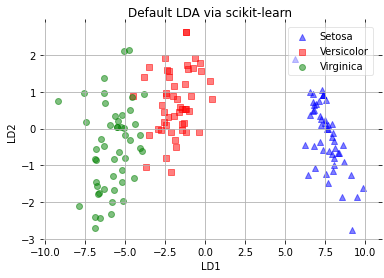

In [9]:
from sklearn.preprocessing import LabelEncoder

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

X = df[['sepal_len',
        'sepal_wid',
        'petal_len',
        'petal_wid']].values
y = df['class'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
lda_dr = LinearDiscriminantAnalysis(n_components=2)
X_lda_sklearn = lda_dr.fit_transform(X, y)
plot_scikit_lda(X_lda_sklearn, title='Default LDA via scikit-learn')

The scatter plot above represents our new feature subspace that we constructed via LDA. We can see that the first linear discriminant LD1 separates the classes quite nicely but the seconds discriminant does not add much valuable information. 

### LDA for Dimensionality Reduction by Hand

While we will not demonstrate how to solve LDA by hand for dimensionality reduction, we can at least summarize the steps below
- Compute the d-dimensional mean vectors for the different classes from the dataset
- Compute the scatter matrices (in-between-class and within-class scatter matrix where scatter is referring to variance)
- Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to generate a d x k dimensional matrix (just like in PCA)
- Use this new d x k matrix to transform the samples onto the new subspace. This is just matrix multiplication between the sample and the new matrix

As you might have noticed, the difference between PCA and LDA in these steps above is that the variance between classes is be computed with the scatter matrix rather than just finding the maximize variance

For more information, a wonderful demonstration can be found at https://sebastianraschka.com/Articles/2014_python_lda.html

### References

1. An Introduction to Statistical Learning with Applications in R by James, Witten, Hastie, and Tibshirani
2. https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/
3. https://machinelearningmastery.com/linear-discriminant-analysis-for-dimensionality-reduction-in-python/
4. https://sebastianraschka.com/Articles/2014_python_lda.html
5. https://www.cs.cmu.edu/~atalwalk/teaching/winter17/cs260/lectures/lec06.pdf